# 1. Importing Data and Data overview

In [3]:
import pandas as pd #Library for data processing
import numpy as np #Library for mathematical operations
from matplotlib import pyplot as plt #Library for data visualization
import seaborn as sns
%matplotlib inline 

#'%'means modulo i.e. a modulo b

%config InlineBackend.figure_format = 'retina'
import warnings #import warnings library
warnings.filterwarnings('ignore') #ignore warning
import os

os.getcwd()
print(os.listdir("../Titanic.Kaggle")) #print out what is included in the directory

['test.csv', 'README.md', 'train.csv', '.ipynb_checkpoints', '.git', 'Titanic.ipynb']


In [5]:
train = pd.read_csv("~/git-practice/Titanic.Kaggle/train.csv") #load the dataset
test = pd.read_csv("~/git-practice/Titanic.Kaggle/test.csv")

In [171]:
print("The shape of this dataset is (row, column):"+ str(train.shape)) #print dimension of the dataset
print("**"*30)
print(train.info()) #prints information of the data
print("**"*30)
print("The shape of the data set is (row, column):"+ str(test.shape))
print("**"*30)
print(test.info())

The shape of this dataset is (row, column):(891, 12)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
************************************************************
The shape of the data set is (row, column):(418, 11)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    4

In [172]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### The data is split into two groups: Training set and test set
The training set includes our dependent variable, passenger survival status along with other independent features like gender, class, fare and Pclass

The test should be used to see how our model performs on unseen data. When you say unseen data, we mean that the algorithmn or ML models have no relation to test data. We do not want to use any part of the test data in any way to modify our algorithms ; Which are the reasons why we clean our test data and train data separately (The test set does not provide passenger's survival status). We are going to use our model to predict passenger survival status.

### Categorical:
Nominal: Cabin, Embarked (Embarked location: C(Cherbourg),Q(Queenstown), S(Southhampton))

Dichotomous: Gender

Ordinal: Pclass(1(Upper), 2(Middle), 3(Lower))

### Numerical:
Discrete: PassengerID, SibSp, Parch, Survived(0 or 1)

Continuous: Age, Fare

### Text Variable: 
Ticket, Name

# 2. Cleaning up data

In [141]:
PassengerId = test.PassengerId #Keeping Passenger ID for later

In [174]:
#train.drop(['PassengerId'], axis=1, inplace=True) #Get rid of the 'PassengerId' column since it is useless
#test.drop(['PassengerId'], axis=1, inplace=True) 

print(train.info())
print("*"*60) #Print "*" 60 stars
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ti

<font color=red>*Note that the features have unequal amount of data entries for every column and they have different types of variables.</font>

### 2.1 Dealing with missing values

In [175]:
train.isnull() #Find entries with null/missing values
train.isnull().sum() #count all the missing values
train.isnull().sum().sort_values(ascending=False) #Sort the values in descending order

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

<font color=red>It seems that 'cabin', 'age' and 'embarked' have missing values in decreasing order!</font>

In [176]:
total = train.isnull().sum().sort_values(ascending=False)
percent = round(total/len(train)*100, 3) #Round the percent to 3 decimal places
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #concatenate two columns into one 

,Total,Percent
Cabin,687,77.104
Age,177,19.865
Embarked,2,0.224
Fare,0,0.000
Ticket,0,0.000
Parch,0,0.000
SibSp,0,0.000
Sex,0,0.000
Name,0,0.000
Pclass,0,0.000


In [177]:
total = test.isnull().sum().sort_values(ascending=False)
percent = round(total/len(test)*100, 2)
pd.concat([total, percent], axis=1, keys=['Total Number of values', 'Percentages']) #Do the same for the test dataset

,Total Number of values,Percentages
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### 2.1.1 'Embaarked Feature'
We see that both datasets have missing values!

In [178]:
#Percent of values (S,C,Q) in Embarked feature
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100, 2)) #'normalize' turns into proportions
total = pd.DataFrame(train.Embarked.value_counts(dropna=False)) #number of S,C,Q values in the feature

total.columns = ['Total Number of values'] #name the function as 'Total'
percent.columns = ['Percentages']
pd.concat([total, percent], axis=1) #concatenate the two columns

,Total Number of values,Percentages
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


**'S'** is the most occuring variable in the Embarked feature followed by **'C'** and **'Q'**.

Also note that there are are a total of 2 NA values in Embarked feature, which is about *0.22%* of the whole.

We will now proceed further and see what the two NA values are.

In [179]:
train[train.Embarked.isnull()] #Printout the NA values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can see that the rows that contain NA values have both paid $80 Fare, are female, Pclass of 1 and have the same ticket number!

We will create box plots to compare the relationship between the Embarked feature and the Fare feature

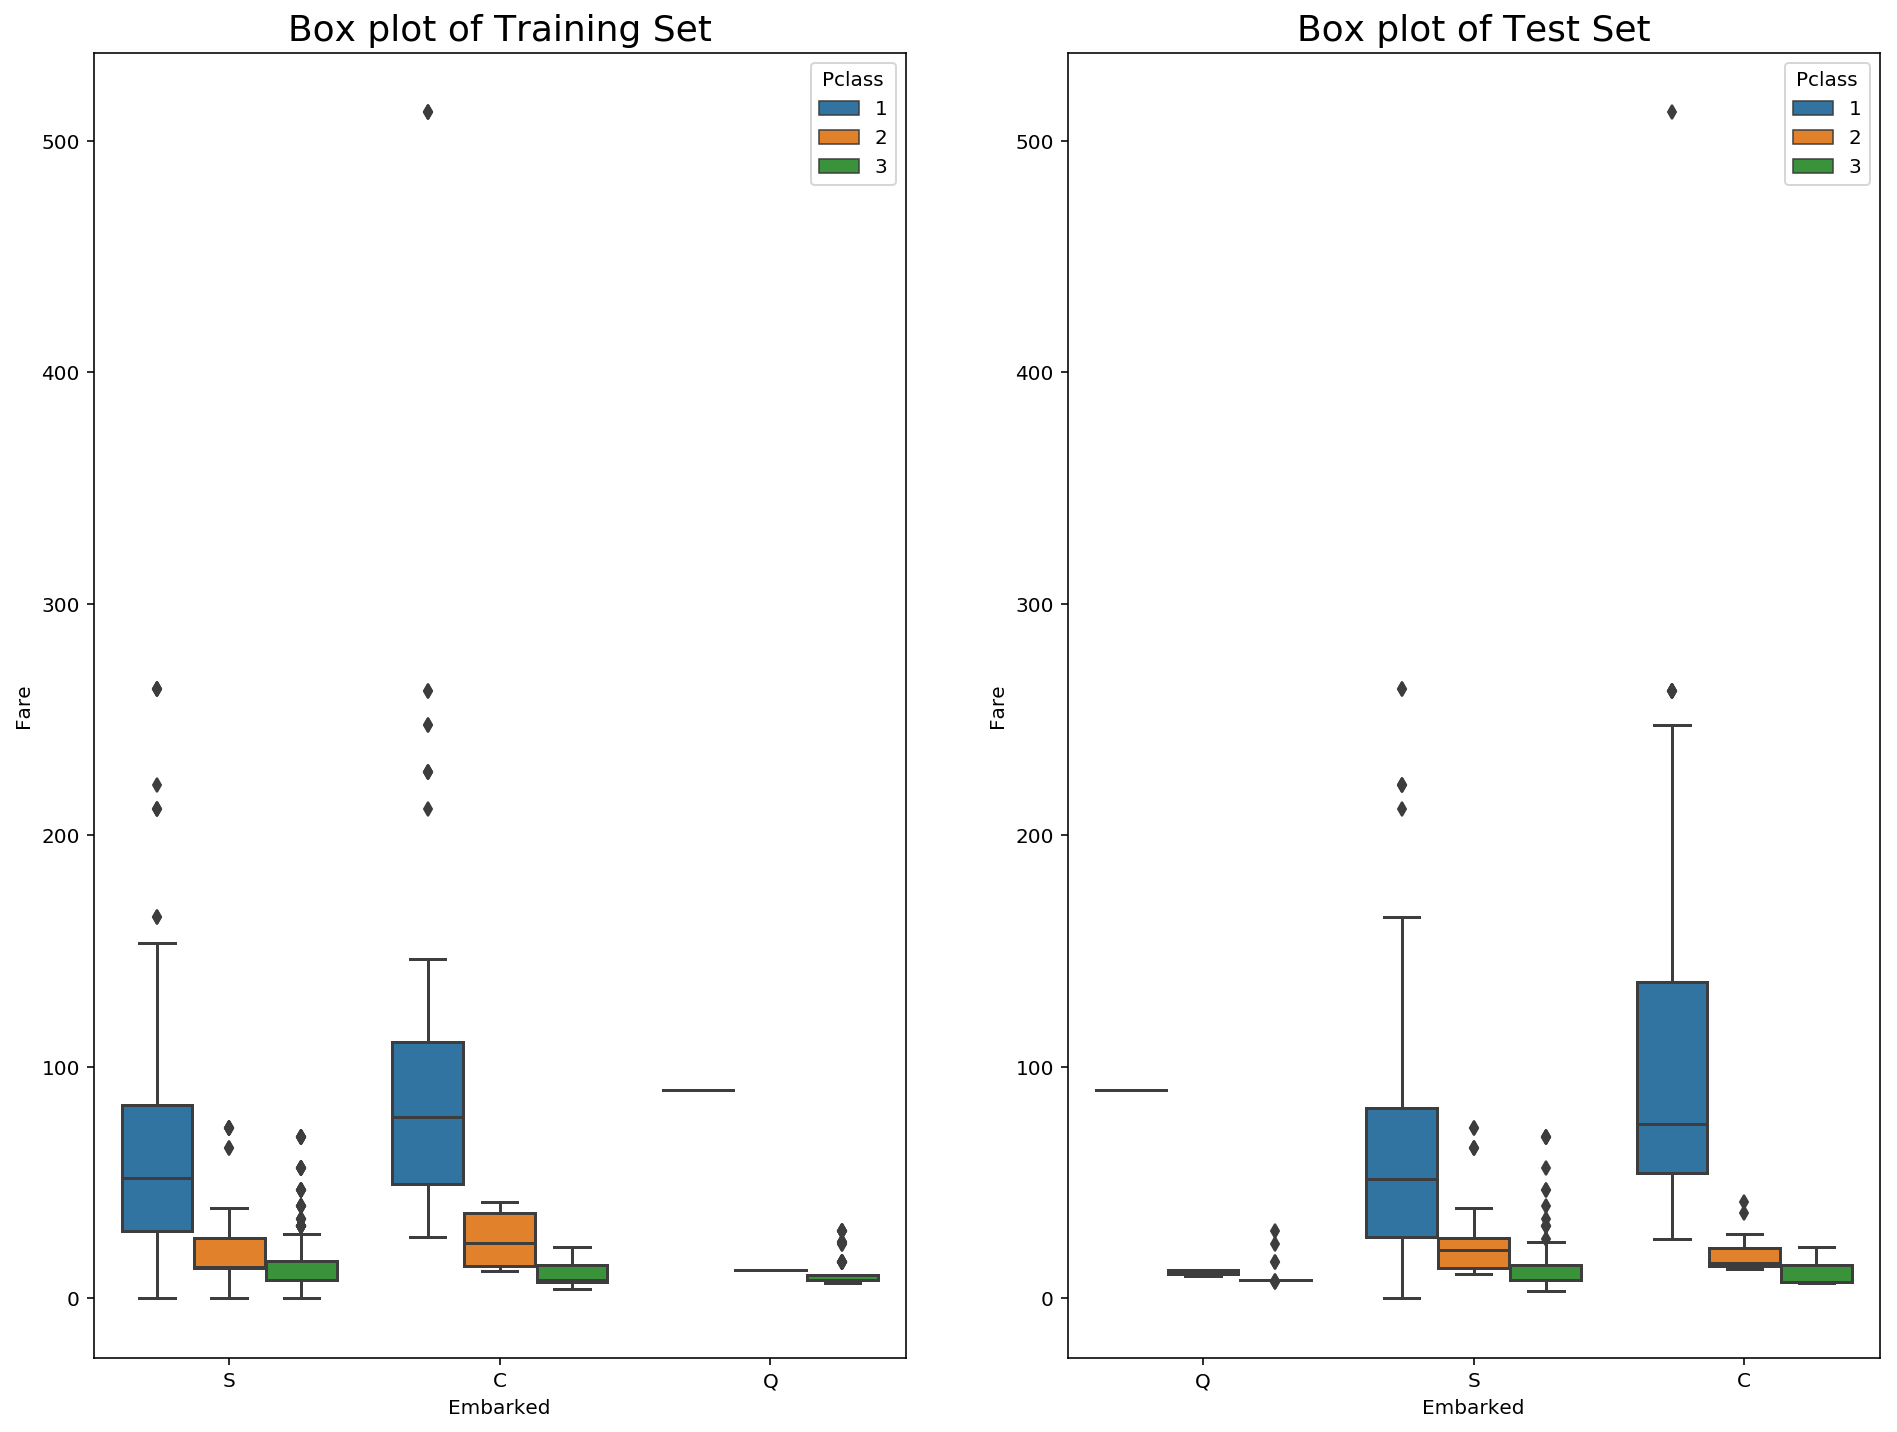

In [180]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train, ax=ax[0]); #Use boxplot (seaborn)
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test, ax=ax[1]);
ax1.set_title("Box plot of Training Set", fontsize=18) #Set title
ax2.set_title("Box plot of Test Set", fontsize=18)
fig.show()

<font color=red>It can be seen from both plots that value 'C' has it's average near $80! So we will proceed and fill-in the missing values with 'C's.</font>

In [181]:
train.Embarked.fillna('C', inplace=True) #Function to replace the null values of the feature ('Embarked') with the mode

### 2.1.2 'Cabin' Feature

In [182]:
print('Train Cabin Missing %: ' + str(train.Cabin.isnull().sum()/len(train.Cabin))) #printout the percentage of missing data in the 'Cabin' Feature
print('Test Cabin Missing %: ' + str(test.Cabin.isnull().sum()/len(test.Cabin))) #Notice we added all the missing values divided by the number of rows in the 'Cabin' Feature

Train Cabin Missing %: 0.7710437710437711
Test Cabin Missing %: 0.7822966507177034


<font color=red>We see that both the Train and Test dataset have +70% missing values!</font>

So what should we do with this feature? Should we get rid of them? How is 'Cabin' feature important in determining what sort of people were likely to live?

One argument could be that the existence of Cabin records would mean passengers who stayed in those cabins might have had higher social status than those who didn't, i.e. they were able to pay more money to be in a better cabin! It could also be that those who had cabin records might have had better chances of being loaded on the survival boats!

In [183]:
survivers = train.Survived #assign a new variable to the 'Survived' Feature under the train dataset

train.drop(['Survived'], axis=1, inplace=True) #get rid of the 'Survived' Feature in the train dataset

all_data = pd.concat([train, test], ignore_index=True) #Concatenate the 'train' and 'test' dataset and also ignore the indecies

all_data.Cabin.fillna("N", inplace=True) #replace the NA values with 'N'

#Notice the steps above in combining two datasets where the 'Survived' Feature was removed from the train dataset
#First we isolated the 'Survived' feature from the train data set
#Second we dropped the 'Survived' feature from the train data set
#Third we concatenated the train and test dataset
#Lastly we filled the missing values with 'N'

In [153]:
all_data.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1006,3,"Chronopoulos, Mr. Demetrios",male,18.0,1,0,2680,14.4542,N,C
926,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,N,C
319,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
440,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,N,S
311,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
386,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,N,S
161,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,N,S
945,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,N,C
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,N,S
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


It can be seen from above that some passengers booked two different Cabins under his name. This is probably because they traveled with their families. Notice also that the Cabin numbers are very close or have same letters.

We think that the letters in the Cabin number is more important, so we will proceed and group the Cabin numbers with the letters.

In [184]:
all_data.Cabin=[i[0] for i in all_data.Cabin] #Create a for-loop to determine the first letter of the each rows of the 'Cabin' feature

with_N = all_data[all_data.Cabin == 'N'] #variable for determining the first letter to be 'N'
without_N = all_data[all_data.Cabin != 'N'] #variable for determining the first letter other than 'N'

all_data.groupby('Cabin')['Fare'].mean().sort_values(ascending=True) #Group each letters by the mean

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [185]:
def cabin_estimator(i): #Define a function to assign Cabin names according to the mean values
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>=47 and i<53:
        a = "E"
    elif i>=53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = "C"
    else:
        a = "B"
    return a

<font color=red>Now we apply the 'cabin_estimator' function to the unknown Cabins!</font>

In [186]:
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x)) #.apply(lambda x: function(x)) to apply the function

In [192]:
all_data = pd.concat([with_N,without_N], axis=0) #We put back the modified column
all_data.sort_values(by = 'PassengerId', inplace=True) #Since 'PassengerId' attributes individual numbers to each of the rows, we use it to sort out the rows to separate train and test datasets

train = all_data[:891] #Now we separate the two datasets!
test = all_data[891:] 

train['Survived'] = survivers #Now we add back the saved variable to the train dataset
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0


In [190]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,G,Q
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,G,S
893,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,G,Q
894,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,G,S
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,G,S


<font color=red>Notice the 'Cabin' Features have no room numbers after the letters!</font>

### 2.1.3 'Fare Feature'

In [195]:
test[test.Fare.isnull()] #Check the null values for the 'Fare Feature'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


<font color=red>We only have one row!</font>

Instead of taking the average of the 'Fare' column with all the values to fill for NA, we take the average of the values where 'PClass' is 3, 'Sex' is male and 'Embarked' is S.

In [197]:
missing_value = test[(test.Pclass ==3)&(test.Sex == 'male')&(test.Embarked == 'S')].Fare.mean()

test.Fare.fillna(missing_value, inplace=True) #replace the missing values with test.Fare mean

**missing_value** = So we took the rows of the 'Fare' feature that had 'Pclass'= 3 & 'Sex' = male & 'Embarked' = S (3 conditions) and took the mean = *12.718872*

after that NA's were replaced with the 'missing_value'

The reason why we took three features that were identical (if categorical) or took the average (if numerical) is because we tried to find all the features that could be related to the missing value and come up with a value that is coherent!

### 2.1.3 'Age Feature'

In [207]:
print("Train missing value : " +str(train.Age.isnull().sum()/len(train)))
print("Test missing value : " +str(test.Age.isnull().sum()/len(test)))

Train missing value : 0.19865319865319866
Test missing value : 0.20574162679425836


<font color=red>Notice both datasets have about 20% of the values missing!</font>

What now? Note some of the standard approaches to dealing with missing values are: **MEAN, MODE** and **MEDIAN**. However, we take a different approach in this case since about **20%** of the data is missing. 

Note that *Age* feature is an important variable in determining one's survival. So it would not be wise to replace the null values with median, mean and mode. We will be using machine learning model *Random Forest Regressor* to *impute* missing value instead of the Null value.

We will keep the *Age* feature for now and return to it when we start the feature engineering approach.

## 3. Visualization and Feature Relations

Before we dive into identifying relations between different features and dependent variable(Survivor), let us create some predictions about how the relationship might turnout among the features.

#### Predictions:
   -  **Gender:** More females survived than male
   -  **Pclass:** Higher socio-economic status meant higher survival rate
   -  **Age:** Younger passengers had higher survival rate

### 3.1 Gender and Survival rate

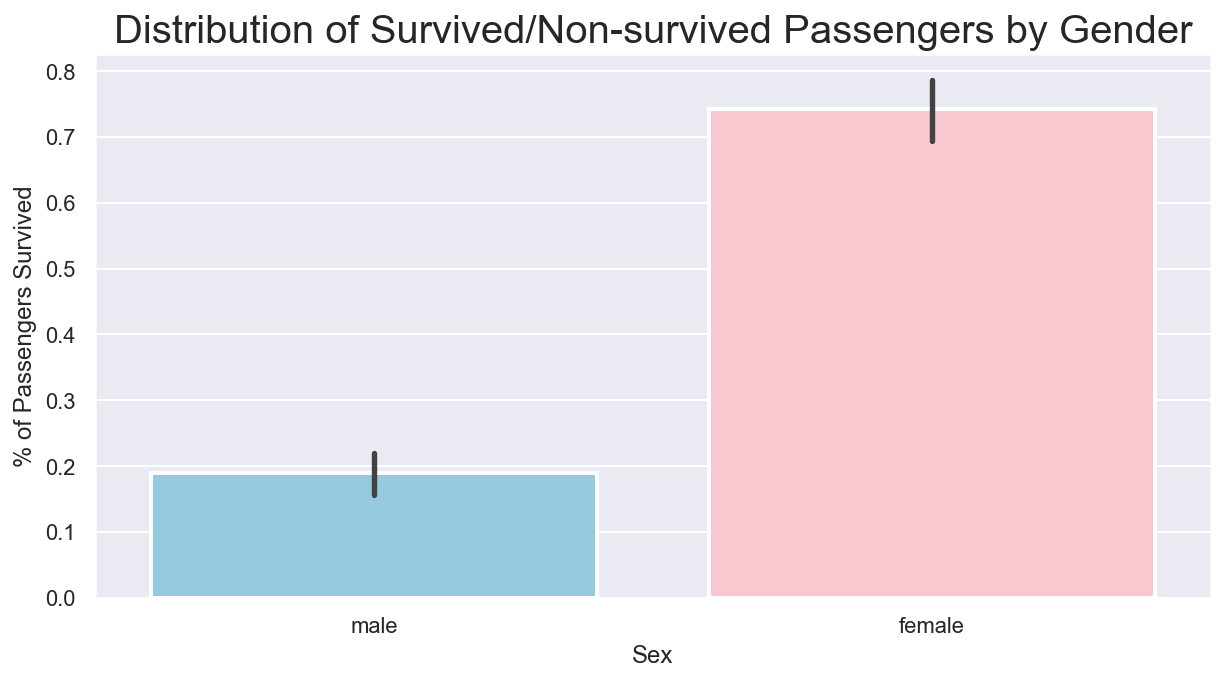

In [244]:
pal = {'male':'skyblue', 'female':'pink'} #set colors for the graphs
plt.subplots(figsize = (10,5)) #set figure size
ax = sns.barplot(x = "Sex", y = 'Survived', data=train, palette=pal, linewidth = 2) #notice we used the 'sns.barplot' function!

plt.title('Distribution of Survived/Non-survived Passengers by Gender', fontsize = 20)
plt.ylabel('% of Passengers Survived', fontsize = 12)
plt.xlabel('Sex', fontsize = 12); #note ';' at the end removes the vector

The barplot above is a distribution of % of male/female that survived.
The plot shows that about <font color=red>75%</font> of female passengers survived, while only about <font color=red>19%</font> of male passengers survived.

#### We will proceed further and compare the survival rate for both male and female:

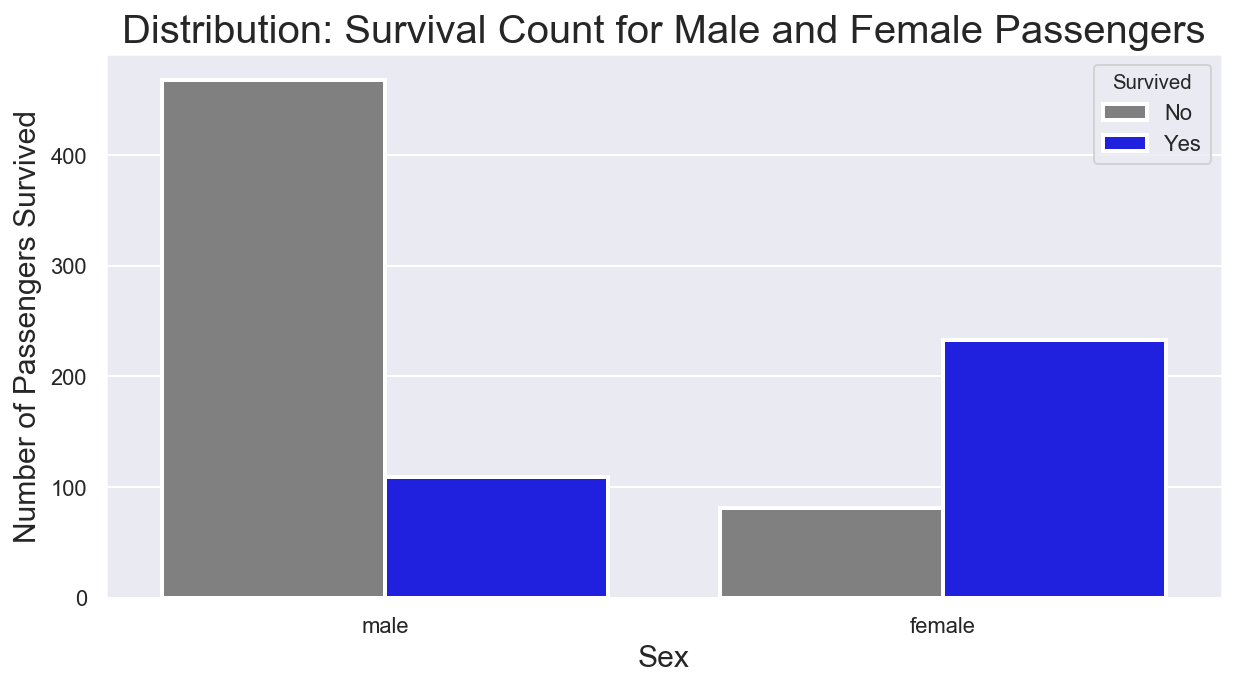

In [245]:
pal = {1:'blue', 0:'gray'} #set colors for each of the variables, '1' for blue and '0' for gray
sns.set(style='darkgrid') #set grid style
plt.subplots(figsize=(10,5))
ax = sns.countplot(x='Sex', hue='Survived', data=train, linewidth=2, palette = pal)

plt.title('Distribution: Survival Count for Male and Female Passengers', fontsize = 20);
plt.xlabel('Sex', fontsize = 15);
plt.ylabel('Number of Passengers Survived', fontsize = 15);

#Modify legend labels
leg = ax.get_legend()
leg.set_title('Survived') #set title for the legend
legs = leg.texts #set variable for the variable names for the legend
legs[0].set_text('No') #change 0 to No
legs[1].set_text('Yes') #change 1 to Yes
plt.show()

It can be seen from the distribution above that out of all the male passengers, <font color=blue>100</font> survived and <font color=red>+450</font> did not survive. On the other hand, <font color=blue>~220</font> females passengers survived while only <font color=red>~90</font> female passengers was not able to survive.

Basing on the two distributions above, we now see that female passengers had higher survival rate than male passengers. We can further infer that when it came to survival, female passengers and children were priority.

### 3.1.1 Passenger Class and Survival Rate

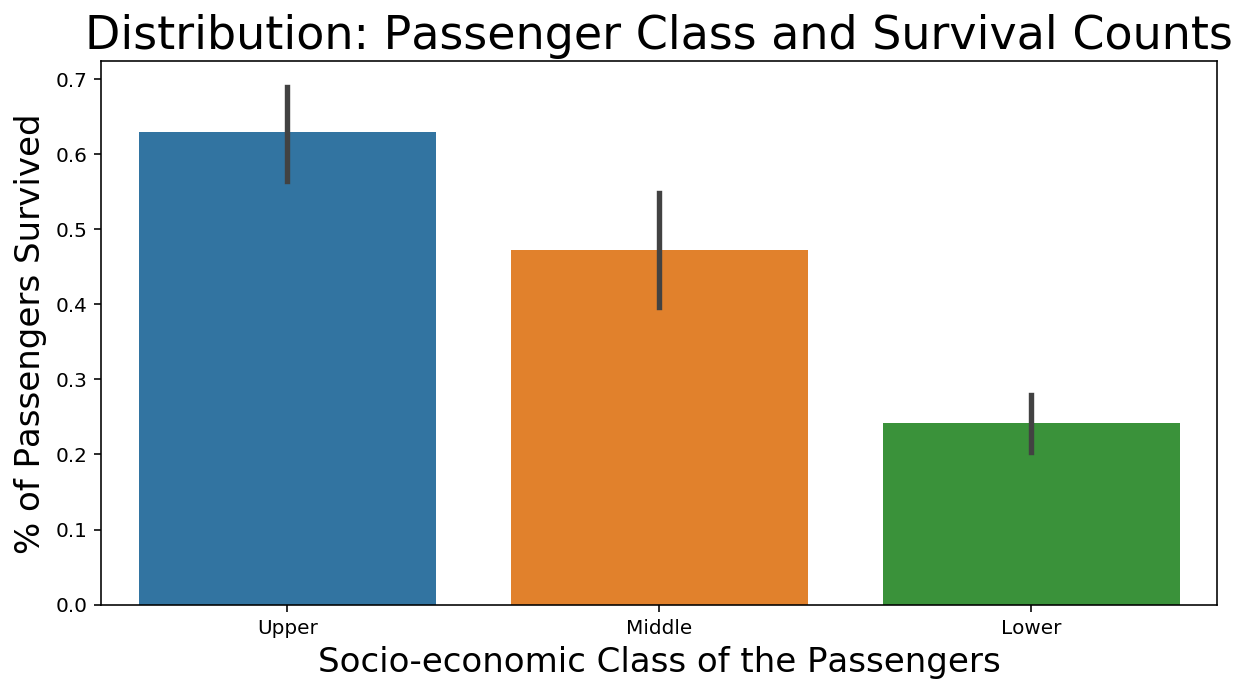

In [6]:
plt.subplots(figsize = (10,5))
sns.barplot(x='Pclass', y='Survived', data=train, linewidth=2); #function for barplot

plt.title('Distribution: Passenger Class and Survival Counts', fontsize =23)
plt.xlabel('Socio-economic Class of the Passengers', fontsize=17)
plt.ylabel('% of Passengers Survived', fontsize=17);

labels=['Upper','Middle','Lower']

val = [0,1,2]
plt.xticks(val, labels); #switch the x labels to 'lables' variable

It can be seen from the graph above that Passengers from *Upper Class* had the highest survival rate followed by *Middle Class* and *Lower Class* with the lowest survival rate.

*~63% of the Upper Class Passengers survived;*

*~48% of the Middle Class Passengers survived;*

*~24% of the Lower Class passengers survived.*



#### We will proceed further and try to plot a kernel density distribution

*Kernel Density Estimation (KDE)* is a non-parametric way to estimate the pdf of a random variable. KDE is a fundamental data smoothing problem where inferences about the **population** are made based on a finite data sample.

**Following is a mathematical definition of the KDE from Wikipedia:**

Let $(x_1,x_2,...,x_n)$ be univariate *iid* sample drawn from some distribution with unknown density *f . We are interested in *estimating* the shape of this function *f*.

$\widehat{f}_h(x)=\frac{1}{n}\sum_{i=1}^{n}K_h(x-x_i)=\frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-x_i}{h})$ , where $K$ is the Kernel (non-negative function) and $h>0$ is a smoothing parameter called the bandhwidth. 

A $K_h$ is called the *scaled kernel* and defined as $Kh(x)=\frac{1}{h}K(\frac{x}{h})$

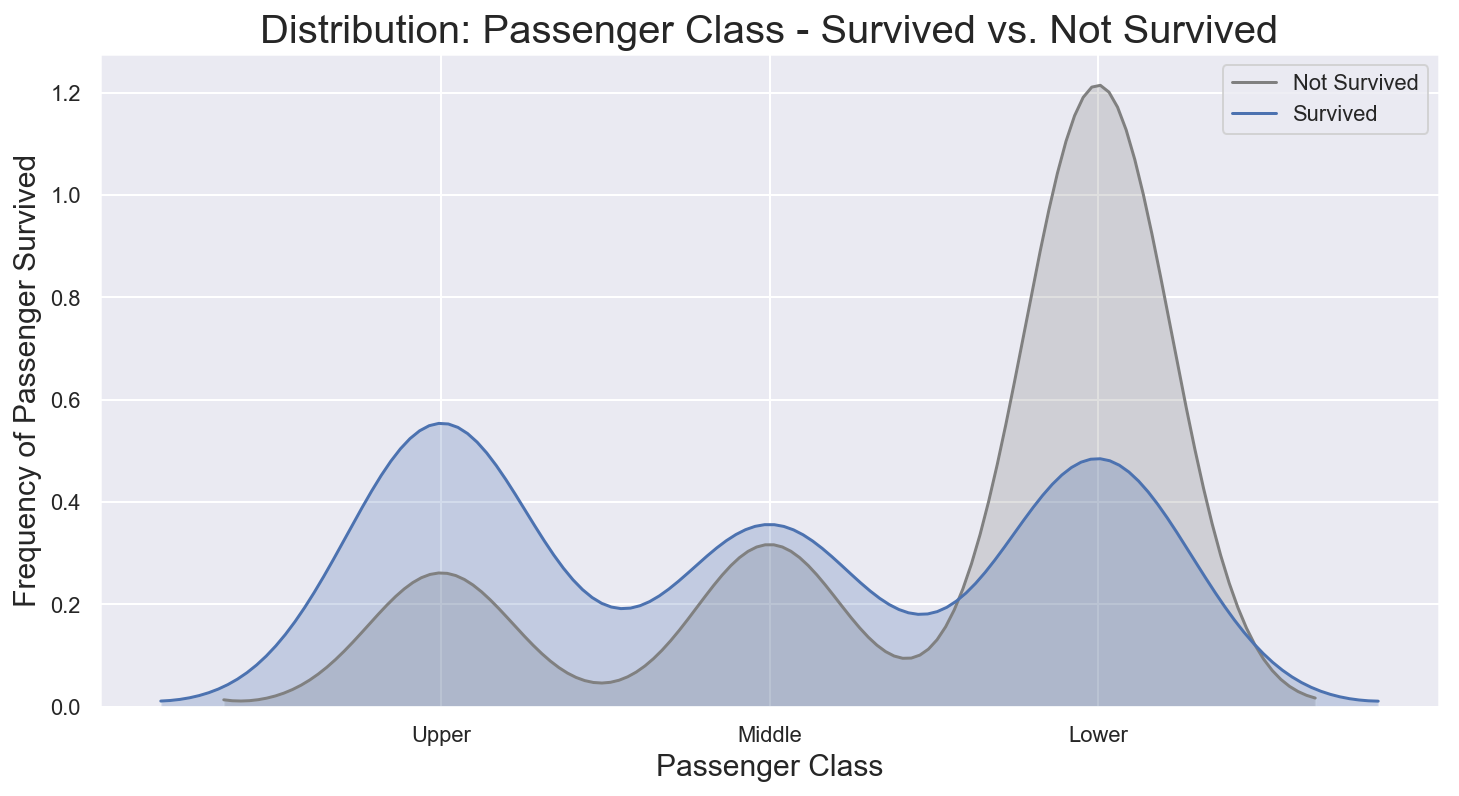

In [48]:
fig = plt.figure(figsize=(12,6),)
sns.set(style='darkgrid')

ax = sns.kdeplot(train.Pclass[train.Survived == 0], color = 'gray', shade=True, label='Not Survived') #Kernel Density function for Pclass where people did not survive
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'], color = 'b', shade=True, label='Survived') #Kernel Density for Pclass where people survived
#above is same as 'ax = sns.kdeplot(train.Pclass[train.Survived == 1], color = 'g', shade = True, label='Survived')'

plt.title('Distribution: Passenger Class - Survived vs. Not Survived', fontsize = 20);
plt.ylabel('Frequency of Passenger Survived', fontsize=15)
plt.xlabel('Passenger Class', fontsize=15);

labels = ['Upper', 'Middle', 'Lower'] 
plt.xticks(sorted(train.Pclass.unique()), labels); #change the labels in the legend

It can be observed from the KDE distribution above that there is an increasing pattern in terms of passengers that were not able to servce as class moves down from *Upper* to *Lower*. *Upper Class* passengers had *~0.28* frequency of people that did not survive, *Middle class* passengers had *~0.30* frequency of people that did not survive and *Lower class* passengers had *~1.25* frequency of people that did not survive.

Looking at the distribution for passengers that survived, *Upper class* passengers had the highest frequency for survival (*~0.58*), followed by *Middle class* passengers (*~0.35*) and *Lower class* passengers (*~0.50*).

*It could also be questionable at this point as lower class people had higher survival frequency than that of the middle class. This is because there were more lower class passengers than middle class passengers.*

#### Summary:
It can be inferred through the graphs that the Upper class had the priority when the tragedy occurred. We will proceed further and compare the survival rate with the ticket fare amount.

### 3.1.3 Ticket Fare and Survival Rate

Again, we will make use of the KDE distribution here

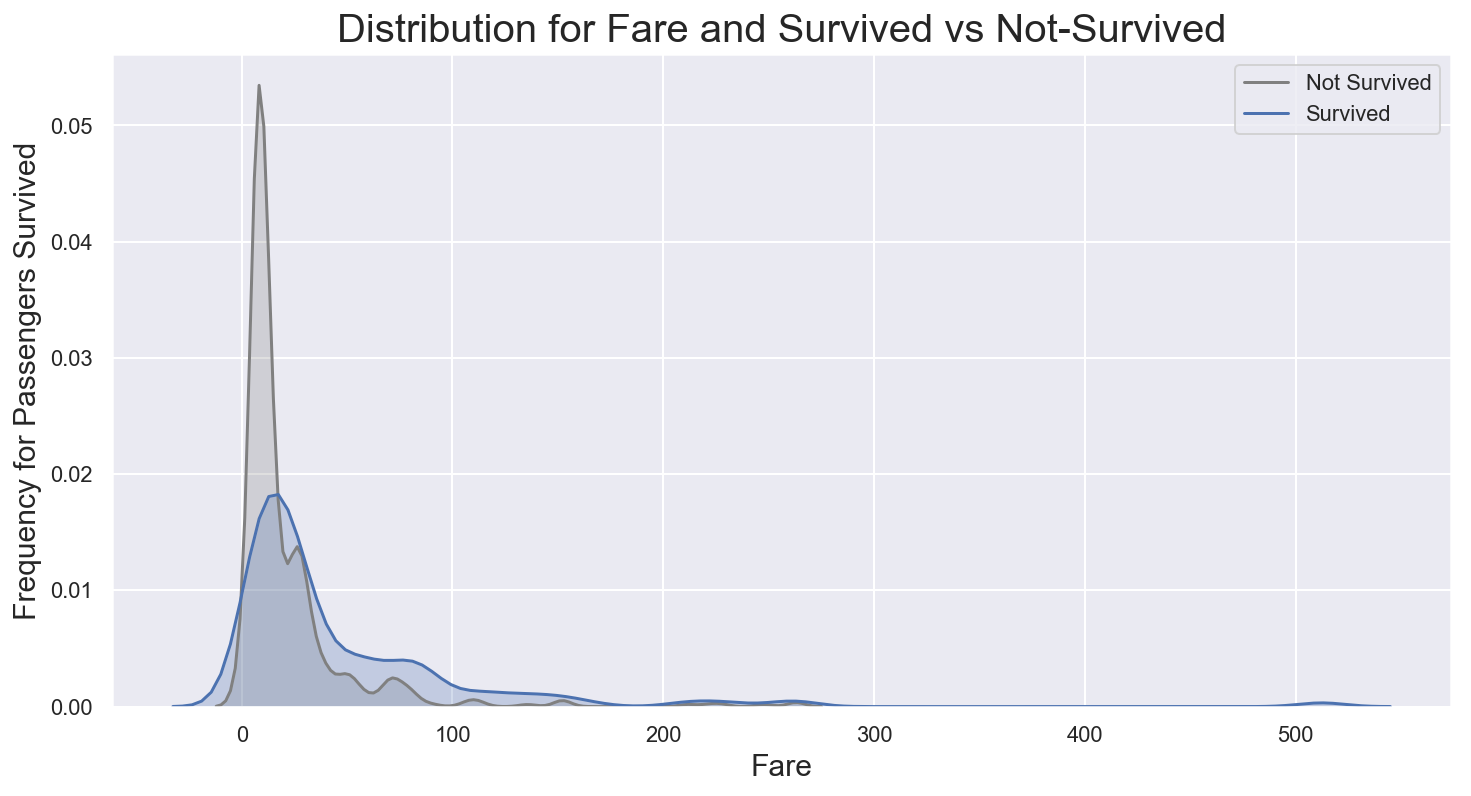

In [47]:
fig = plt.figure(figsize = (12,6),)
sns.set(style='darkgrid')

ax = sns.kdeplot(train.Fare[train.Survived == 0], color ='gray', shade=True, label='Not Survived') #plot for Fare and 'Not Survived'
#ax = sns.kdeplot(train.loc['Fare',(train['Survived'] == 0)])
ax = sns.kdeplot(train.Fare[train.Survived == 1], color ='b', shade=True, label= 'Survived') #plot for Fare and 'Survived'

plt.title('Distribution for Fare and Survived vs Not-Survived', fontsize=20);
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Frequency for Passengers Survived', fontsize=15);

*Things we can observe from the graph aobve:*
   1. The spike under the fare of *100* means that a lot of passengers who bought the ticket that cost *100* did not survive.
   2. When the fare is more than about *280*, it could mean that either everyone who paid more that *280* survived or there could be an outlier that complicates our judgement!
   
   So let's go ahead and check!


In [38]:
train[train.Fare > 280] #check for all the data that exceeds fare amount of 280 dollars

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


These three are outliers of *~$512*. We can delete this point but we will keep them for now!

### 3.1.4 Age and Survival Rate

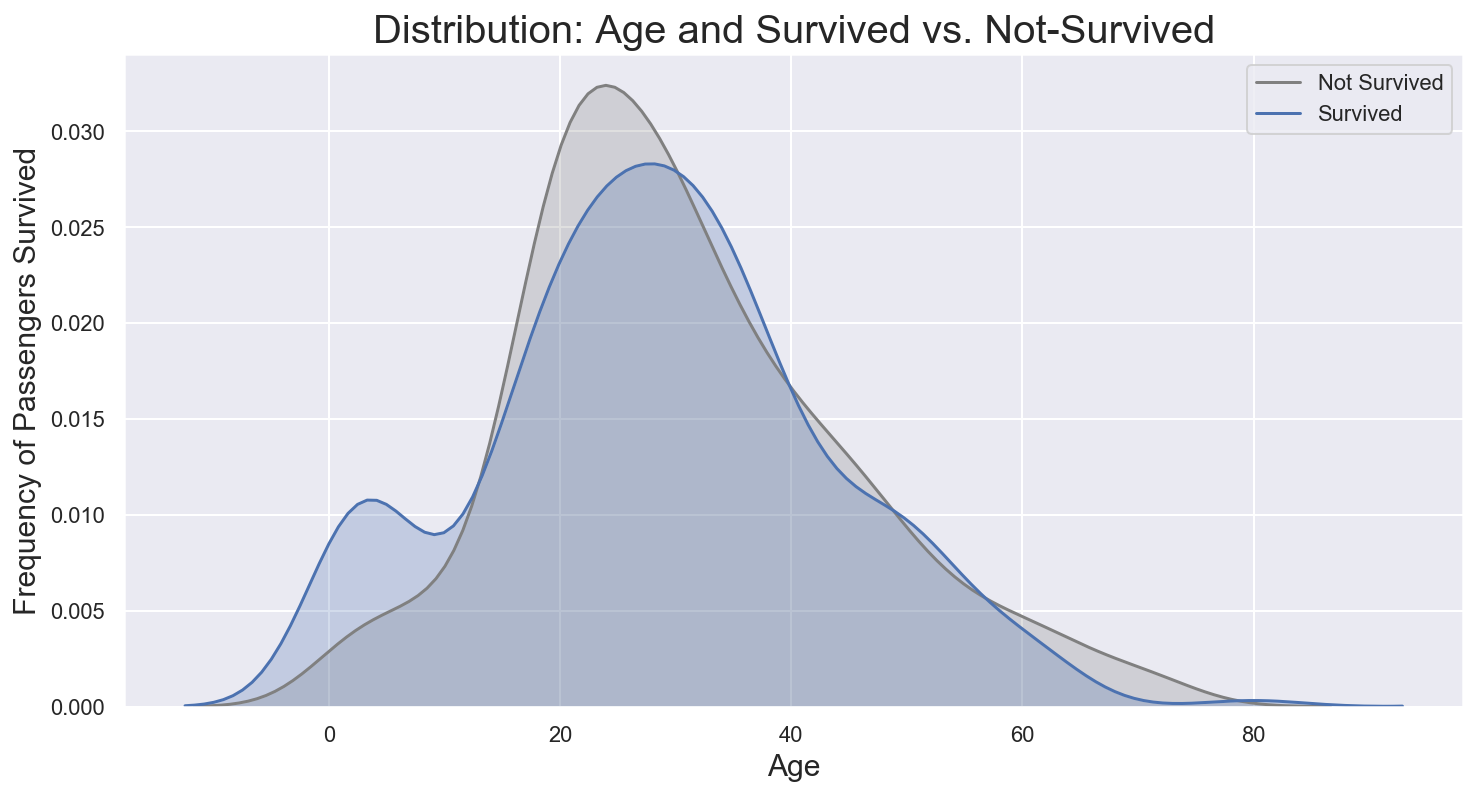

In [51]:
fig = plt.figure(figsize=(12,6),)
ax = sns.kdeplot(train.Age[train.Survived==0], color='gray', shade=True, label='Not Survived')
ax = sns.kdeplot(train.Age[train.Survived==1], color='b', shade=True, label='Survived')

plt.title('Distribution: Age and Survived vs. Not-Survived', fontsize= 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency of Passengers Survived', fontsize=15);

It can be noted from the graph above that children/infants had the priority when it came to survival. Nothing in particular seems significant other than this.

### 3.1.5 Combined Feature Relations

We will show more than two features in a single graph.

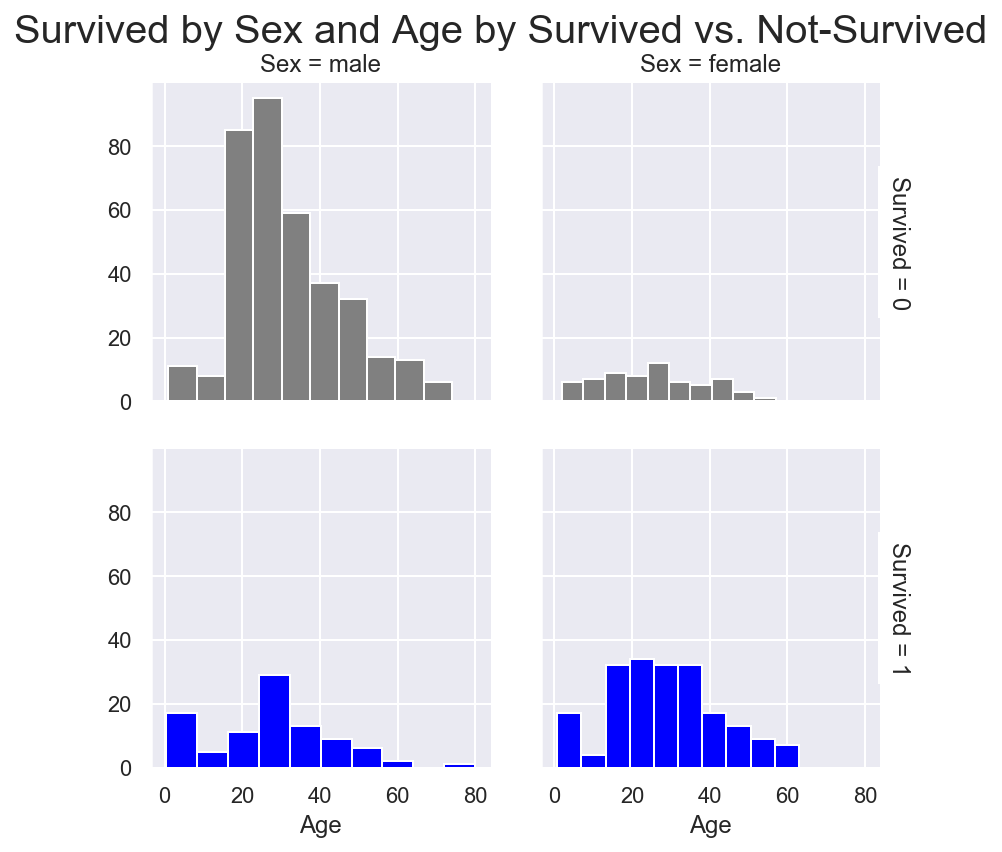

In [83]:
pal = {1:'blue',0:'gray'} #set colors for the graphs

g = sns.FacetGrid(train, size = 3, col='Sex', row='Survived', margin_titles=True, hue='Survived', palette=pal) #create a 'FacetGrid' for the train dataset where the x-axes is 'Age' and y-axes is Survived (0 or1)
g = g.map(plt.hist, 'Age', edgecolor = 'white'); #plot histograms

g.fig.suptitle('Survived by Sex and Age by Survived vs. Not-Survived', size = 20) #'supertitle' for all the subplots
plt.subplots_adjust(top=0.9);

Facetgrid is a way of visualize multiple variables and their relationships at once. From 3.1, we know female passengers had higher survival count than the male passengers (females had the priority when it came to survival!). 
Now, from the graph, we can see what age groups had higher/lower survival rates.

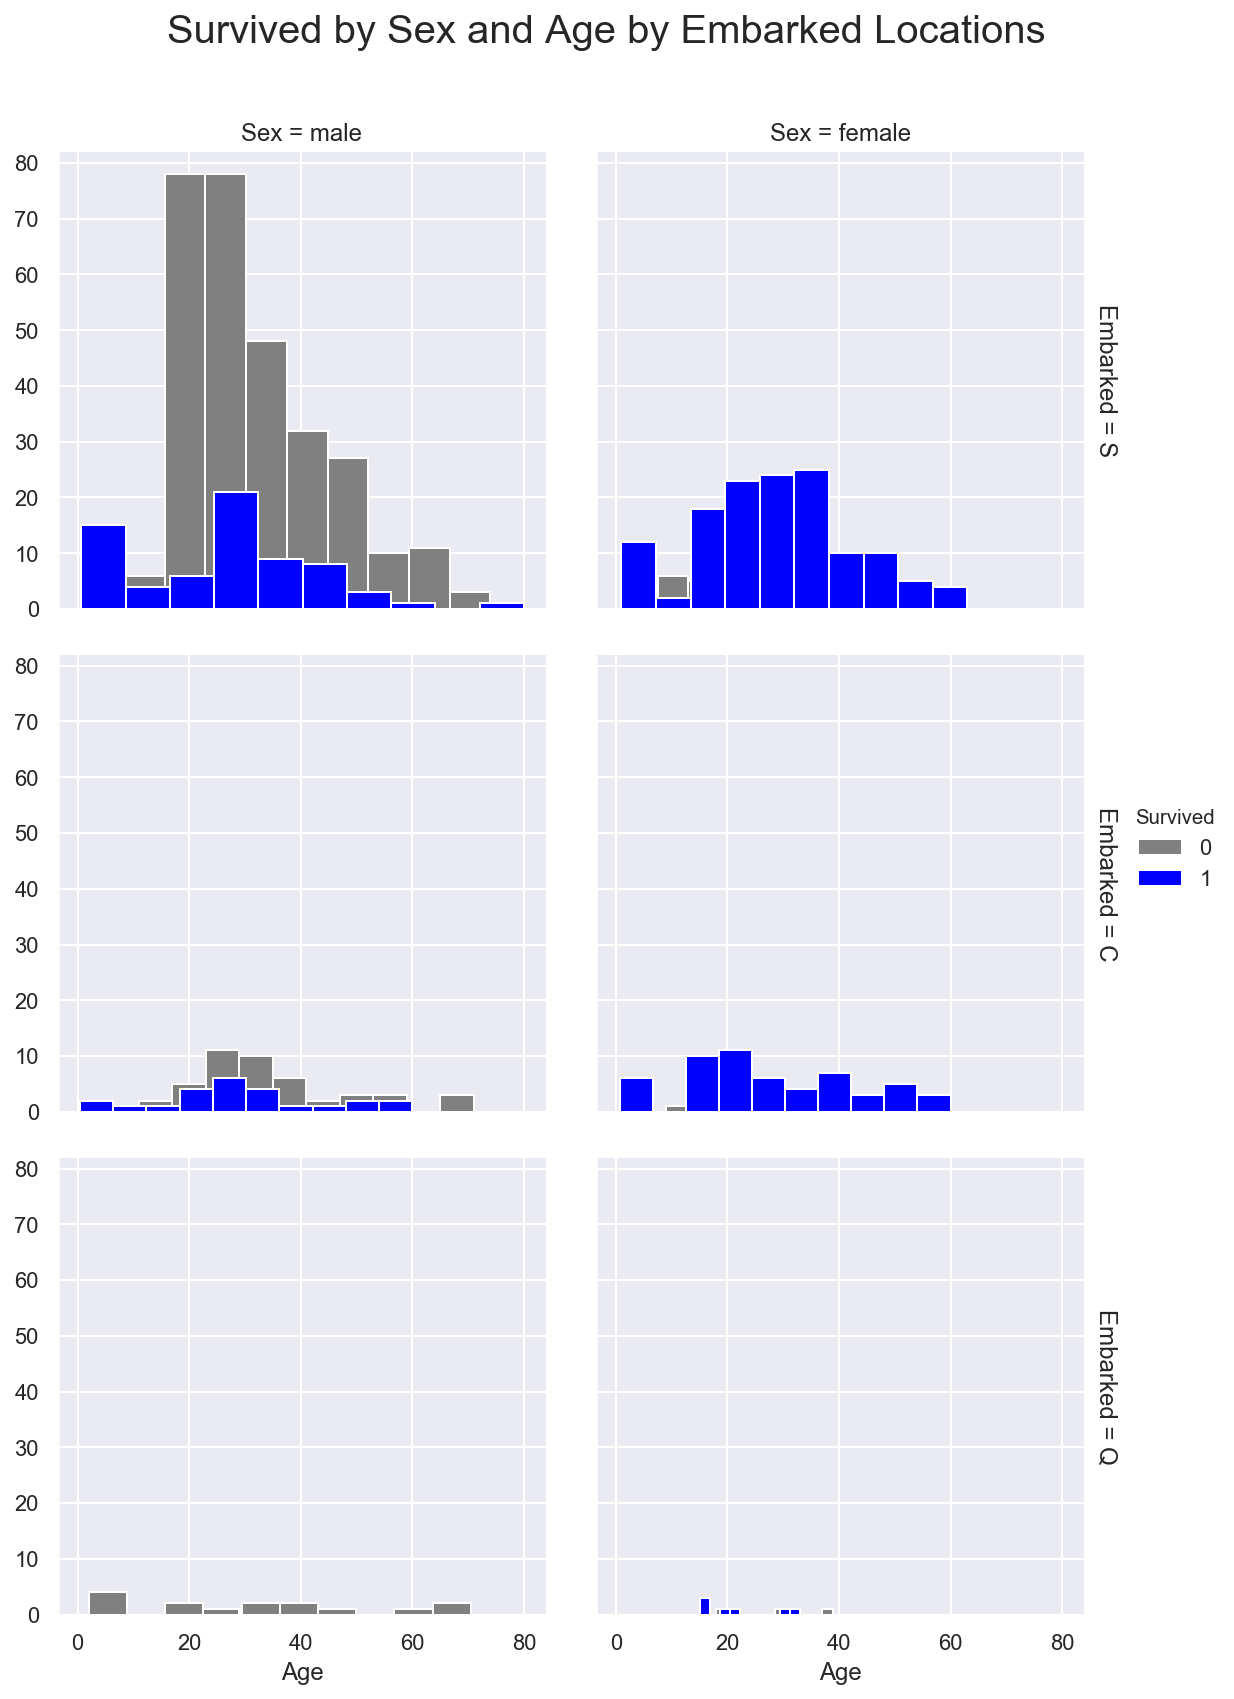

In [85]:
g = sns.FacetGrid(train, size=4, col='Sex', row='Embarked', margin_titles=True, hue='Survived', palette=pal)
g = g.map(plt.hist, 'Age', edgecolor= 'white').add_legend();

g.fig.suptitle("Survived by Sex and Age by Embarked Locations", size= 20) #Set title
plt.subplots_adjust(top=0.9) #move down the graphs to the suptitle would not appear on the graphs

The graph above shows four features at once, **'Embarked'**,**'Age'**,**'Survived'** and **'Sex'**.

The <font color=blue>blue color</font> indicates survival status.

The columns represent sex: male or female

The rows represent the embarked towns: S, C and Q

#### Summary:

1. Most Passengers are from Southampton (S).
2. More than 60% of the passengers who died are from Southampton.
3. More than 60% of the passengers that lived are from Cherbourg (C).
4. Almost everyone from Queenstown (Q) did not survive.
5. Most of the few females that were from Queenstown survived.

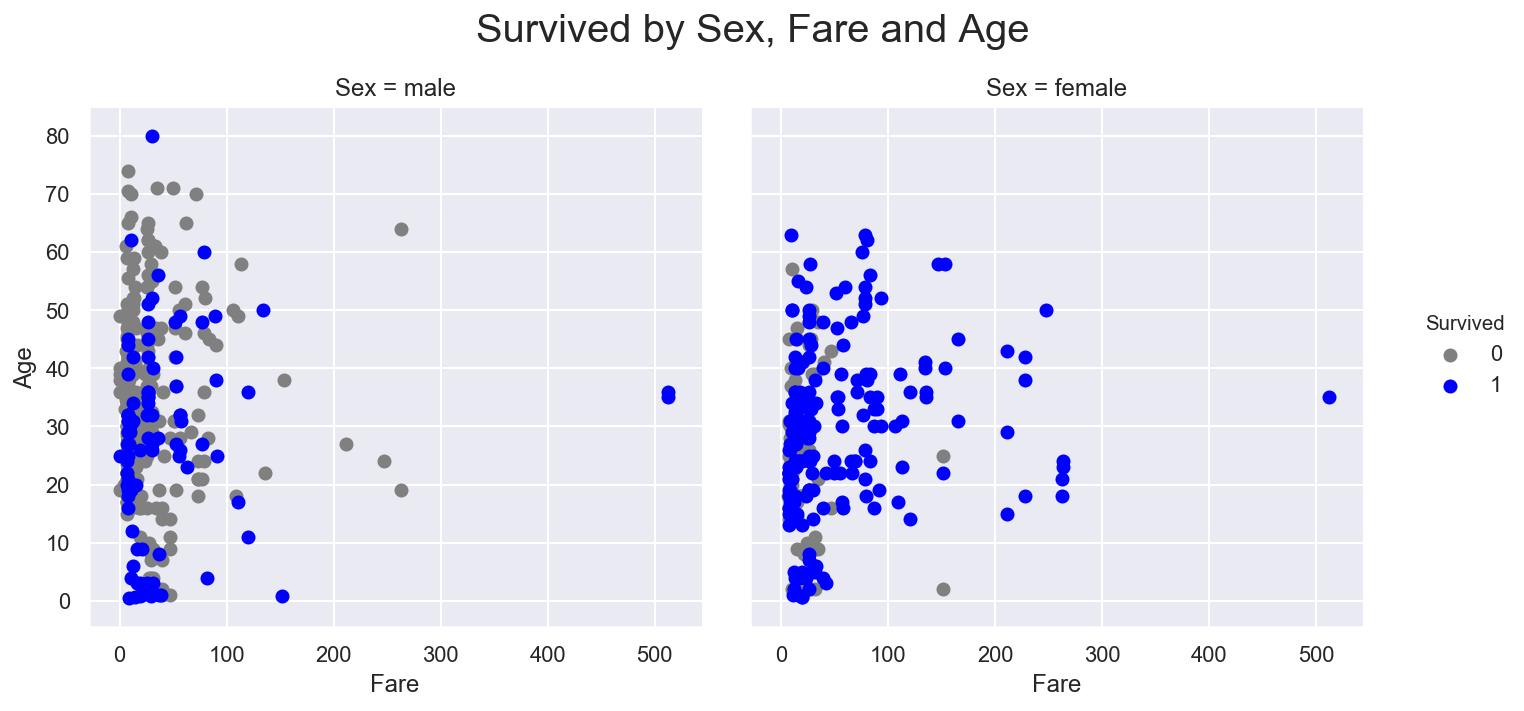

In [96]:
g = sns.FacetGrid(train, size=5, hue='Survived', col='Sex', margin_titles=True, palette=pal) #Set up the FacetGrid
g.map(plt.scatter, 'Fare', 'Age').add_legend()

g.fig.suptitle('Survived by Sex, Fare and Age', size=20)
plt.subplots_adjust(top=0.85)

First the scatter plot is graphed according to 'Fare' on the x-axis, 'Age' on the y-axis. The columns represent 'Sex' and <font color=blue>blue dots</font> represent survived passengers and the <font color=gray>gray dots</font> represent non-survived passengers.

We can see from the graph on the left that there are more <font color=gray>gray dots</font> than <font color=blue > blue dots</font>, which shows that more female passengers survived and that they had the priority.

We also see the three outliers we saw from **3.1.3** above (passengers that paid fare +$500). So we proceed and delete the outliers!

Lastly, we see that most of the passengers paid less than $100 for their fare.

In [97]:
train = train[train.Fare < 500] #Now we drop the three outliers

We will now do a factor plot. Factor plot is an informative tool when you want to compare multiple groups. The following is a factor plot with it's parameters:

    sns.factorplot(data = df, 
              x = 'input'
              y = 'input'
              hue = 'input')

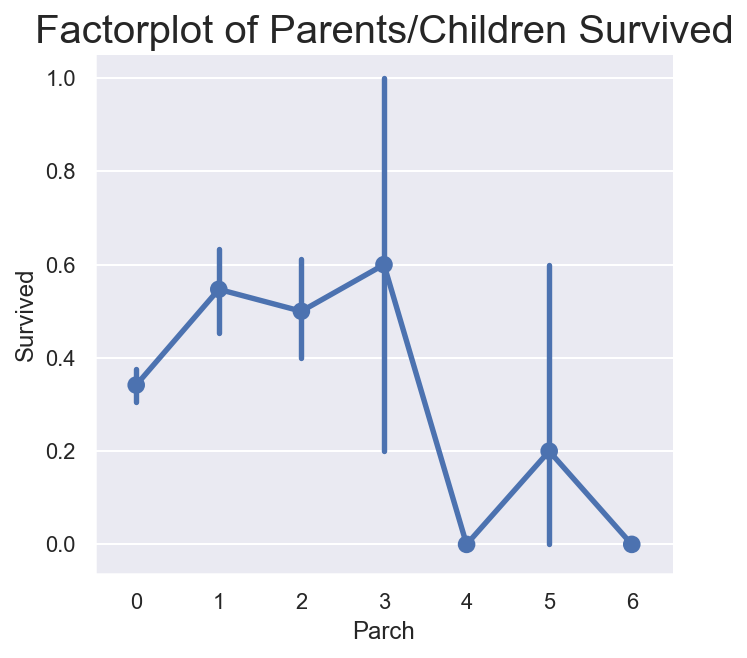

In [108]:
sns.factorplot(x='Parch',  y='Survived', data=train, size=5)
plt.title('Factorplot of Parents/Children Survived', fontsize=20);
plt.subplots_adjust(top=0.85)

We see from the graph that passengers who traveled as groups had less survival rate than those who traveled with less members of the group or alone.

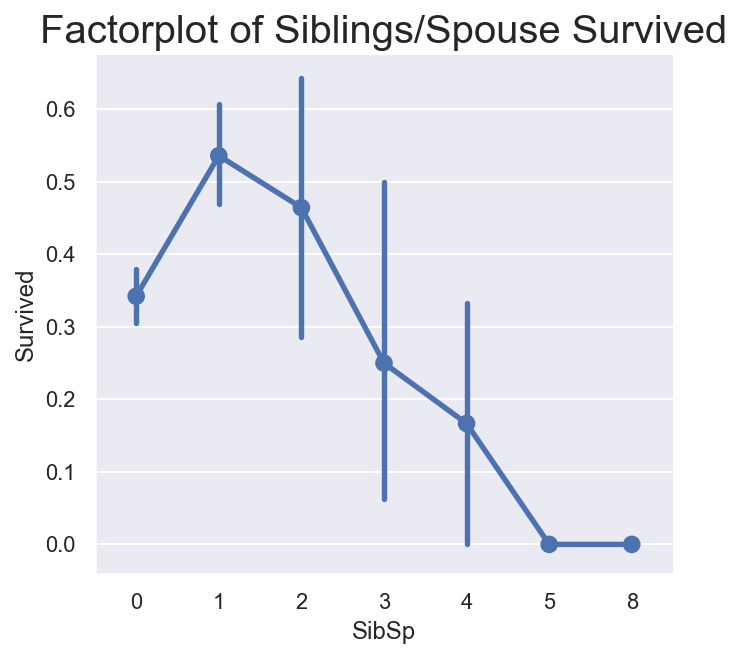

In [110]:
sns.factorplot(x='SibSp', y='Survived', data=train, size=5)
plt.title('Factorplot of Siblings/Spouse Survived', fontsize=20)
plt.subplots_adjust(top=0.85)

We also see that passengers who traveled with less siblings/spouse had higher survival rates than others.

In [111]:
train['Sex'] = train.Sex.apply(lambda x:0 if x =='female' else 1) #Now we modify/replace nominal data with binary data for convenience
test['Sex'] = test.Sex.apply(lambda x:0 if x == 'female' else 1) #notice the use of '.apply(lambda x: 'desired value' if x == 'target' else '!desired value')'

## 4. Statistical Overview

In [112]:
train.describe() #this is similar to to 'summary(input)' function in R

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


we have above a *statistical summary* of the train dataset

In [117]:
train.describe(include=['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,202,886
unique,888,680,146,3
top,"Kalvik, Mr. Johannes Halvorsen",CA. 2343,G6,S
freq,1,7,4,644


In [118]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().reset_index() #mean of 'Pclass' and 'Survived' shown by classes

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [130]:
survived_summary = train.groupby('Survived') #mean of the  sorted/grouped by 'Survived' (0 or 1)
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [133]:
survived_summary = train.groupby('Sex') #mean of the features sorted/grouped by 'Sex'
survived_summary.mean().reset_index()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,431.578275,0.741214,2.162939,27.888462,0.696486,0.651757,42.985091
1,1,453.260870,0.186087,2.394783,30.705477,0.431304,0.234783,23.830658


In [135]:
survived_summary = train.groupby('Pclass') #mean of the features sorted/grouped by 'Pclass'
survived_summary.mean().reset_index()

,Pclass,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
0,1,460.225352,0.624413,0.563380,38.280984,0.422535,0.356808,78.124061
1,2,445.956522,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550


#### Summary:
   1. A total of 891 rows and 9 columns.
   2. A total of ~0.382 passengers survived.
   3. A total of ~0.741 female passengers survived while only ~0.186 male passengers survived.
   4. A total of ~0.63 Upper class passengers survived while ~0.24 Lower class passengers survived.

### 4.1.1 Correlation Matrix and Heatmap

In [146]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


We have calculated the correlation for each of the features. We see that 'Sex' has the highest correlation (~0.55) followed by the 'Pclass' feature (~0.334).

In [150]:
 corr = train.corr()**2 #double asterisk '**' means exponentiation
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

Squaring the correlation values not only returns positive correlations but also amplifies the relationships.

Now we graph the heatmap!

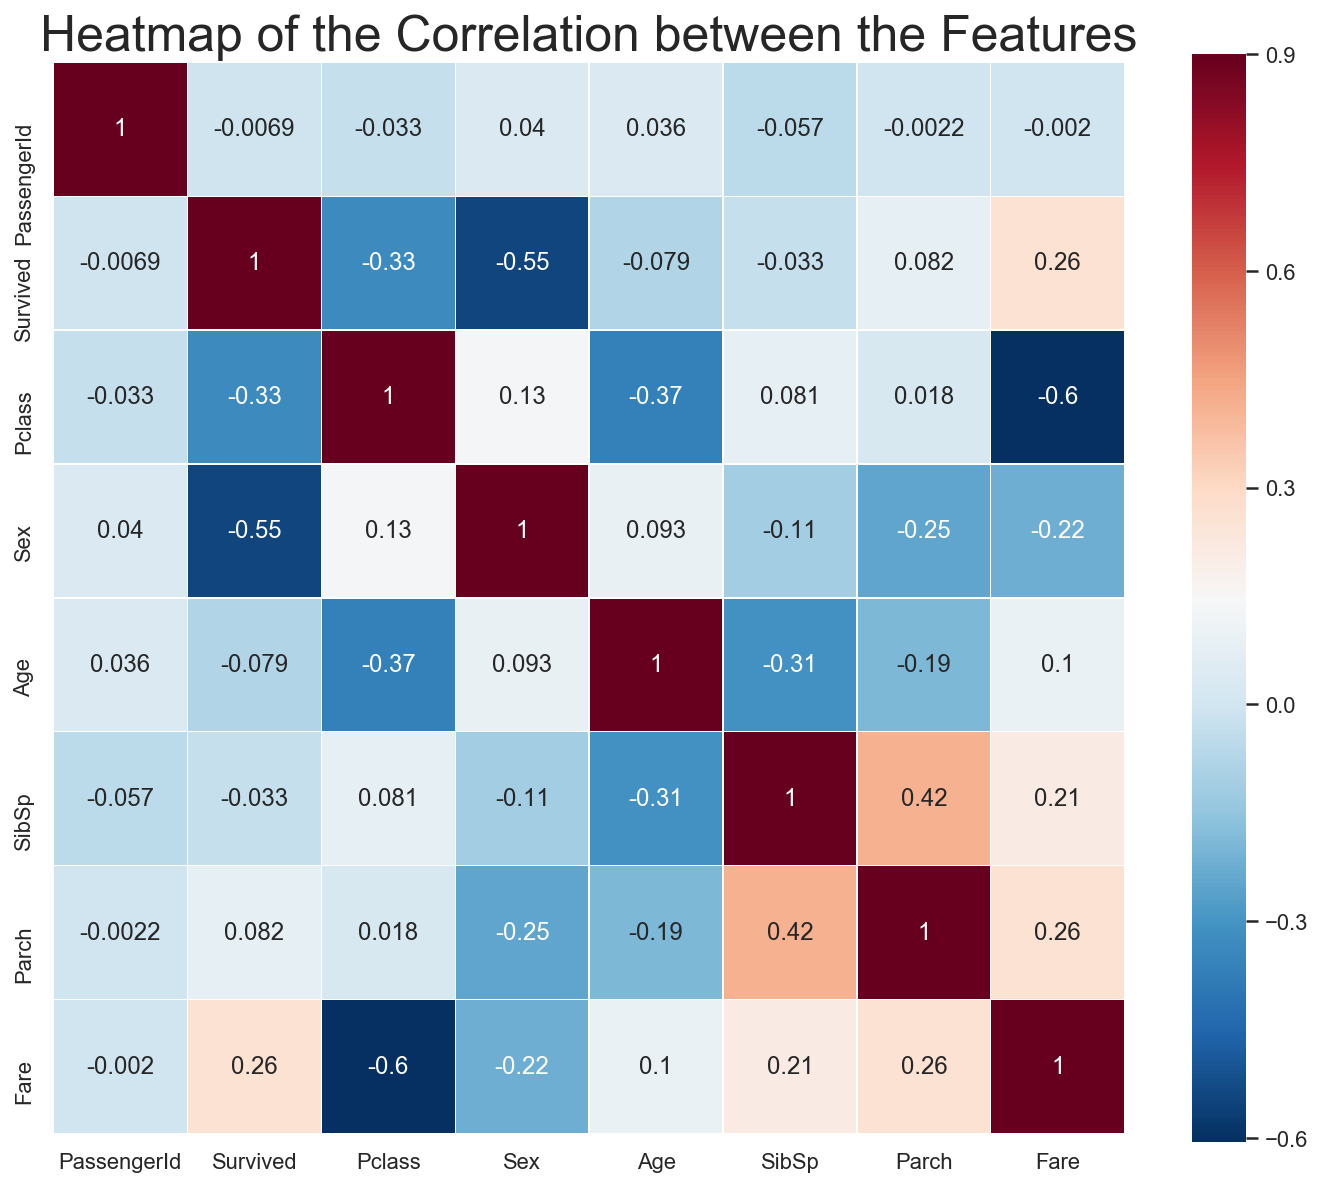

In [166]:
#mask = np.zeros_like(train.corr(), dtype=np.bool)

plt.subplots(figsize = (12,10)) #set size of the graph
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r', linewidths=0.1, linecolor='white', vmax = 0.9, square=True); #heatmap function

plt.title('Heatmap of the Correlation between the Features', fontsize=25);

#### Summary:
   1. **Notable Positively correlated features:** 
       - 'Fare' and 'Survived' **(0.26)** (Higher fare -> higher survival rate)
   
   2. **Notable Negatively correlated features:** 
       - 'Fare' and 'Pclass' **(-0.6)** (Less fare -> lower the class)
       - 'Sex' and 'Survived' **(-0.55)** (female -> higher chance of survival)
       - 'Pclass' and 'Survived' **(-0.33)**

### 4.1.2 Statistical Test for Correlation

#### Hypothesis Testing
   - **Question:** Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?
   
   - **Question:** Is there a substantial difference in survival rate between the male and female passengers?
   
   
   
   - $H_0$(Null hypothesis): There is no difference in the survival rate between the male and female passengers. Or the mean difference between male and female passenger in the survival rate is zero.
   - $H_1$(Alternate hypothesis): There is a difference in the survival rate between male and female passengers. Or the mean difference between male and female passenger in the survival rate is not zero.
   
   - **Test Statistics :** This is a two-sided test since the difference of the survival rate could be greater or less than zero. Standard deviation, $\sigma$, is the unknown parameter and $n$ is small, so we will use the t-distribution.
   - **Significance level:** We will use the standard significance level of $1-\alpha=0.95$ or $95\%$ confidence.


We will proceed and calculate the p-value

In [167]:
male_mean = train[train['Sex'] == 1].Survived.mean() #male survival rate mean

female_mean = train[train['Sex'] == 0].Survived.mean() #female survival rate mean

print('Male Survival Mean :'+str(male_mean))
print('Female Survival Mean:'+str(female_mean))

print('The mean difference between male and female survival rate:'+str(female_mean - male_mean))

Male Survival Mean :0.18608695652173912
Female Survival Mean:0.7412140575079872
The mean difference between male and female survival rate:0.5551271009862481


<font color=red>Note that this is not the population mean, but the sample mean!</font>

Now we will use the sampling distribution approach to do the test. We will take 50 samples

In [181]:
M = train[train['Sex'] == 1]
F = train[train['Sex'] == 0]

import random

MS = random.sample(list(M['Survived']), 50) #take 50 samples from male and female 
FS = random.sample(list(F['Survived']), 50)
                              
MSM = np.mean(MS) #take the mean of the 50 samples
FSM = np.mean(FS)
                              
print('Male Sample Mean :'+str(MSM))
print('Female Sample Mean :'+str(FSM))
print('Difference between male and female sample means :'+str(FSM - MSM))

Male Sample Mean :0.14
Female Sample Mean :0.68
Difference between male and female sample means :0.54


We have randomly chosen 50 male and female passengers. Note the differnce between the mean is 0.54

#### Now to answer the question: *How confident are we that, the measured difference is real or statistically significant?*

#### **Answer:** We can perform t-test to  evaluate the claim. t-test is used to evidence of the significant difference between population mean with the hypothesized mean or difference between the two population means (our case, 2 sample t-test).

The following is the t-statistic:

   ### $t=\frac{\bar x-\mu}{\frac{S}{\sqrt{n}}}........(1)$
   
   where 
   
   - $\bar x$ is the sample mean (test statistic)
   - $\mu$ is the hypothesized mean ($H_0$)
   - $S$ is the standard deviation
   - $n$ is the sample size
   
<font color=red>In order to calculate the two sample population mean, we will use the following equation:</font>
 
 ### $t=\frac{\bar x_M -\bar x_F}{\sqrt{S^2(\frac{1}{n_M}+\frac{1}{n_F})}}........(2)$
 
 where 
   
   - $\bar x_M$ is the sample mean for the male passengers
   - $\bar x_F$ is the sample mean for the female passengers
   - $S^2$ is the sample variance
   - $n_M$ and $n_F$ are the sample number of observations for male/female passengers
 
Equation (2) looks intimidating at first, but if we take a close look, we see that equation (1) and (2) are quiet similar. The only difference we see is that the hypothesis mean $H_0$ is replaced with another sample mean and one sample size is replaced by two sample sizes!

We will now make use of the *Scipy.stats* library to find the t-statistic.

In [ ]:
import scipy.

In [171]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
